In [154]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
sns.set()

In [55]:
tele_com_data = pd.read_csv("Telco_customer_churn.csv")

In [56]:
tele_com_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [195]:
tele_com_data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [57]:
tele_data_relavant = tele_com_data[['Monthly Charges','Churn Value']]

In [58]:
tele_data_relavant = tele_data_relavant.copy()

In [59]:
tele_data_relavant.sort_values('Monthly Charges', inplace=True, ascending=True)

In [60]:
tele_data_relavant

,Monthly Charges,Churn Value
4613,18.25,0
2997,18.40,0
6758,18.55,0
6945,18.70,0
2725,18.70,0
...,...,...
1347,118.35,1
5417,118.60,0
4736,118.60,0
3422,118.65,0


In [219]:
# Define the bin edges (intervals)
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Create a new column 'interval' based on the 'Monthly Charges' column
tele_data_relavant['interval'] = pd.cut(tele_data_relavant['Monthly Charges'], bins=bins, labels=['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120'])


In [220]:
tele_data_relavant

,Monthly Charges,Churn Value,interval
4613,18.25,0,10-20
2997,18.40,0,10-20
6758,18.55,0,10-20
6945,18.70,0,10-20
2725,18.70,0,10-20
...,...,...,...
1347,118.35,1,111-120
5417,118.60,0,111-120
4736,118.60,0,111-120
3422,118.65,0,111-120


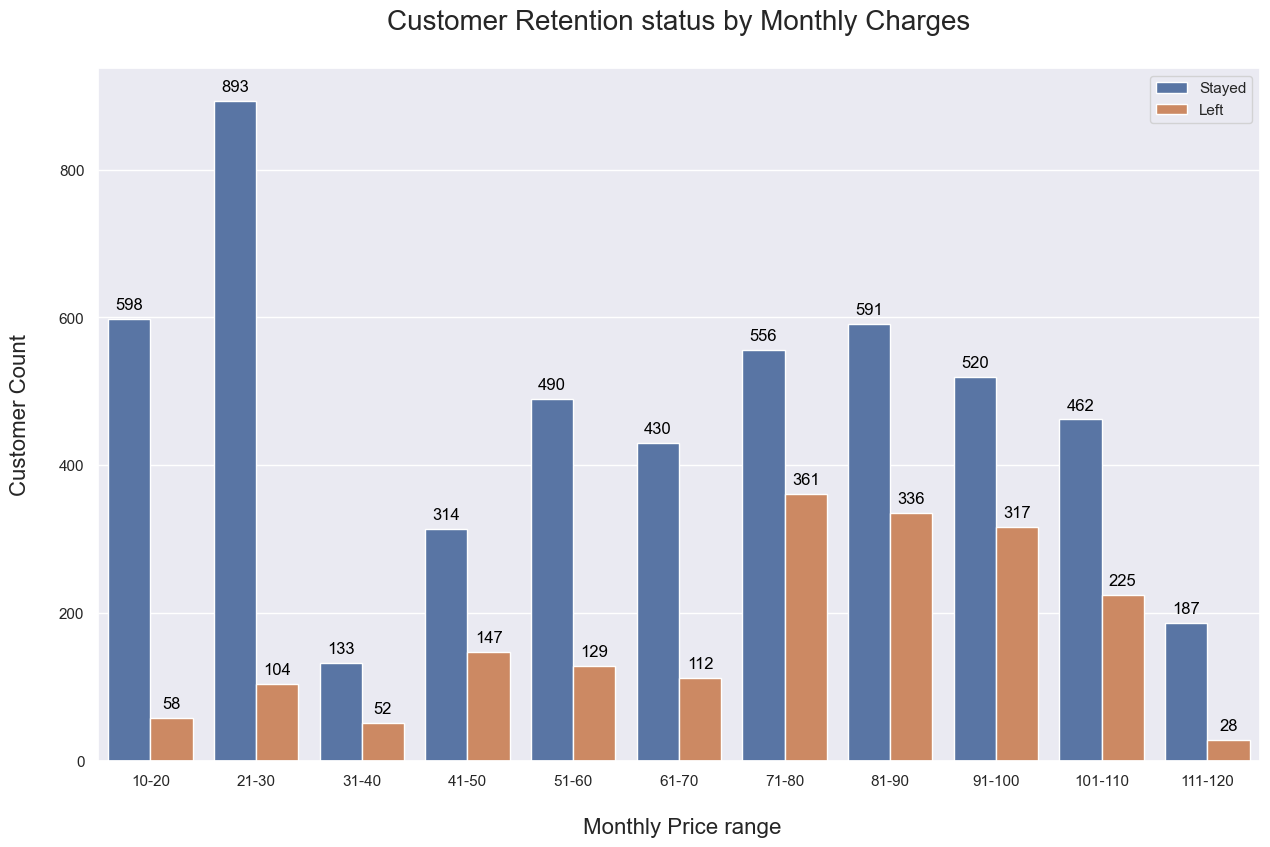

In [266]:
#ploting the relation between Customer retention and Monthly charges
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 9))
plot = sns.countplot(data=tele_data_relavant_senior, x='interval', hue='Churn Value', ax=ax1)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
plt.legend(['Stayed', 'Left'], loc='upper right')
plt.title("Customer Retention status by Monthly Charges\n", fontsize=20)
plt.xlabel("\n Monthly Price range", fontsize=16)
plt.ylabel("Customer Count\n", fontsize=16)
plt.show()

- Majority of the customer retention can be visibile at the monthly price rate of 21-30 are staying with the telecom partner
- How ever we can see that Customers in the monthly rates 10-21 , 71-100 are also staying with the operator but in those range we can see lot of customers are opting for other telecom operators

In [222]:
tele_data_relavant_senior = tele_com_data[['Senior Citizen','Churn Value','Monthly Charges']]
tele_data_relavant_senior = tele_data_relavant_senior.copy()
tele_data_relavant_senior.sort_values('Monthly Charges', inplace=True, ascending=True)
tele_data_relavant_senior

,Senior Citizen,Churn Value,Monthly Charges
4613,No,0,18.25
2997,No,0,18.40
6758,No,0,18.55
6945,No,0,18.70
2725,No,0,18.70
...,...,...,...
1347,No,1,118.35
5417,No,0,118.60
4736,No,0,118.60
3422,No,0,118.65


In [224]:
# Define the bin edges (intervals)
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

# Create a new column 'interval' based on the 'Monthly Charges' column
tele_data_relavant_senior['interval'] = pd.cut(tele_data_relavant_senior['Monthly Charges'], bins=bins, labels=['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-110', '111-120'])

In [234]:
tele_data_relavant_senior

,Senior Citizen,Churn Value,Monthly Charges,interval
4613,No,0,18.25,10-20
2997,No,0,18.40,10-20
6758,No,0,18.55,10-20
6945,No,0,18.70,10-20
2725,No,0,18.70,10-20
...,...,...,...,...
1347,No,1,118.35,111-120
5417,No,0,118.60,111-120
4736,No,0,118.60,111-120
3422,No,0,118.65,111-120


In [245]:
tele_data_relavant_senior[tele_data_relavant_senior['Senior Citizen'] == 'Yes']['interval'].value_counts().sort_index()

10-20       17
21-30       59
31-40       25
41-50       58
51-60       59
61-70       62
71-80      205
81-90      200
91-100     222
101-110    188
111-120     47
Name: interval, dtype: int64

In [246]:
tele_data_relavant_senior[tele_data_relavant_senior['Senior Citizen'] == 'No']['interval'].value_counts().sort_index()

10-20      639
21-30      938
31-40      160
41-50      403
51-60      560
61-70      480
71-80      712
81-90      727
91-100     615
101-110    499
111-120    168
Name: interval, dtype: int64

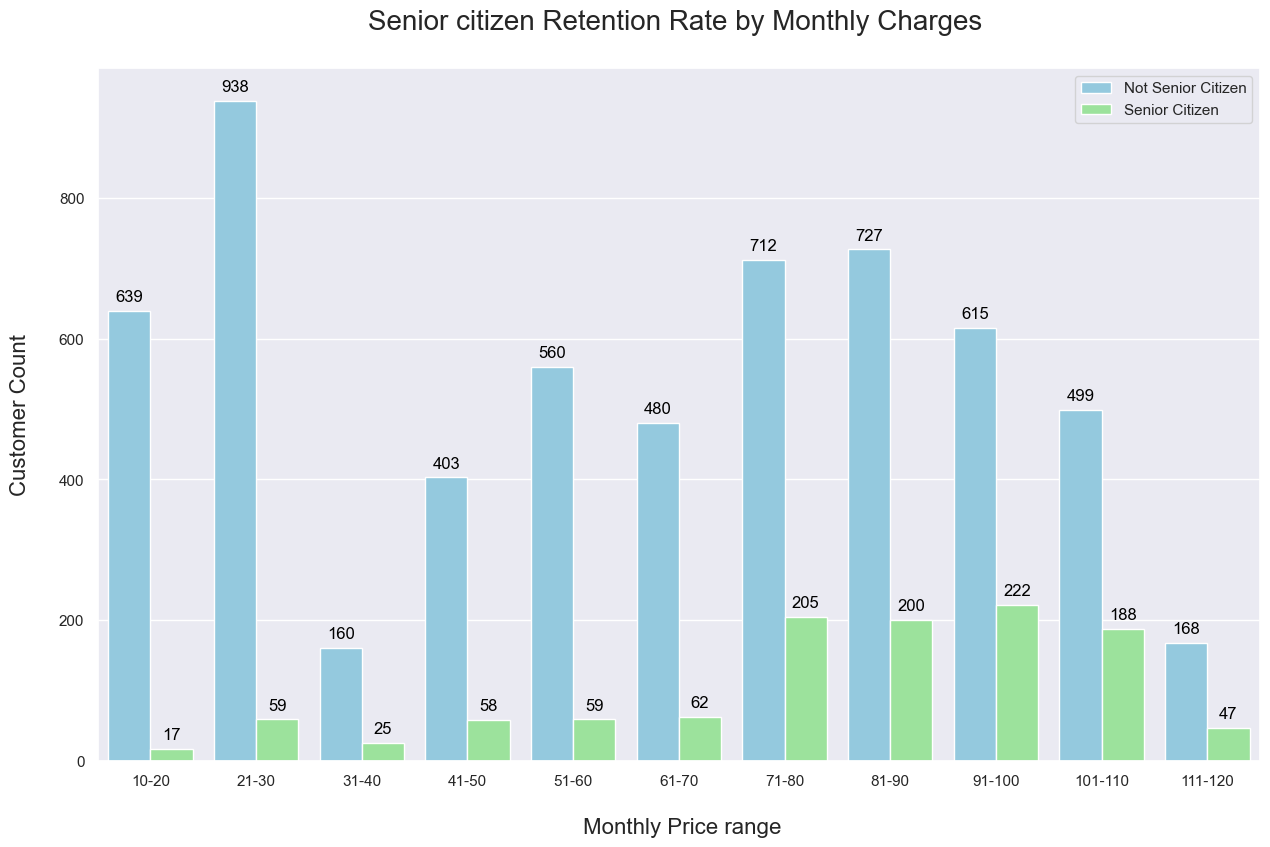

In [253]:
custom_palette = {'Yes': 'lightgreen', 'No': 'skyblue'}
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15, 9))
plot = sns.countplot(data=tele_data_relavant_senior, x='interval', hue='Senior Citizen',palette=custom_palette, ax=ax1)
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
plt.legend(['Not Senior Citizen', 'Senior Citizen'], loc='upper right')
plt.title("Senior citizen Retention Rate by Monthly Charges \n", fontsize=20)
plt.xlabel("\n Monthly Price range", fontsize=16)
plt.ylabel("Customer Count\n", fontsize=16)
plt.show()


- From the count plot we can understand that the individual who are not senior citizen customers are mostly staying consistant with the telecom partners.
- Moreover majority of the customers are interested in monthly price range of 21-30 interval
- We can conclude that the price range for the telecom operator would be 21-30
